In [ ]:
# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP, #
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO     #
# DESTE EP.                                                      #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM,   #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM          #
# DESONESTIDADE ACADÊMICA OU PLÁGIO.                             #
#                                                                #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS        #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A          #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E        #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS    #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP.                           #
#                                                                #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO         #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR             #
# DESONESTIDADE ACADÊMICA.                                       #
#                                                                #
#                                                                #
# Nome : Eike Souza da Silva                                     #
# NUSP : 4618653                                                 #
# Turma:                                                         #
# Prof.: Ronaldo Fumio Hashimoto                                 #
##################################################################

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
from cv2 import resize
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/eike012/mac0417.git

Cloning into 'mac0417'...
remote: Enumerating objects: 386, done.
remote: Counting objects: 100% (264/264), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 386 (delta 0), reused 264 (delta 0), pack-reused 122
Receiving objects: 100% (386/386), 197.43 MiB | 39.20 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
dir = '/content/mac0417/EP1/imgs'

In [ ]:
def loadImages(path):
    images = []
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images.append(img)
    return images

def displayImages(images):
    total_width = sum(img.shape[1] for img in images)
    max_height = max(img.shape[0] for img in images)

    canvas = np.zeros((max_height, total_width), dtype=np.uint8)

    current_x = 0
    for img in images:
        canvas[:img.shape[0], current_x:current_x + img.shape[1]] = img
        current_x += img.shape[1]

    plt.figure(figsize=(100, 90))
    plt.imshow(canvas, cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
def df_size(path: str) -> float:
  tot = 0

  for arq in os.listdir(path):
    file_path = os.path.join(path, arq)
    file_size = os.path.getsize(file_path)
    tot += file_size

  in_mb = tot/(1024 * 1024)

  return in_mb

def summary_table(dataframe: object, path: str):

  base_imgs_size = df_size(path)

  class_names = list(set(dataframe['classe']))
  nclass = len(class_names)
  nimgs = len(list(dataframe['nome']))

  img = plt.imread(path + "/1.jpg")
  height, width, _ = img.shape

  print("==============================================")
  print("Tabela Global Sumária: ")
  print(f"  *  ", end="")
  print(f"Nome das classes: ", end="")
  for _class in class_names:
    print(f"{_class}, ", end="")
  print(f" ")
  print(f"  *  Número de classes: {nclass};")
  print(f"  *  Número de imagens: {nimgs};")
  print(f"  *  Tamanho da base (bytes): {round(base_imgs_size)}MB;")
  print(f"  *  Resolução das imagens: {height} linhas por {width} colunas;")
  print("==============================================")

In [ ]:
def readImg(img_to_be_rd, imgs_path):
  conc_path = os.path.join(imgs_path, img_to_be_rd)
  actual_img = cv2.imread(conc_path)

  return actual_img

def readGrayImg(img_to_be_rd, imgs_path):
  conc_path = os.path.join(imgs_path, img_to_be_rd)
  actual_img = cv2.imread(conc_path, cv2.IMREAD_GRAYSCALE)

  return actual_img

In [ ]:
def rgb2gray(path):
  new_path = "/content/mac0417/EP2/augmentedDataSet/originalGrayDataset"
  os.makedirs(new_path)
  os.chdir(new_path)
  for image in os.listdir(path):
    img = readImg(image, path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(f'{image}', gray_img)

In [ ]:
def contrastStretching(grayPath):
  new_path = "/content/mac0417/EP2/augmentedDataSet/contrastStretched"
  os.mkdir(new_path)
  os.chdir(new_path)

  for image in os.listdir(grayPath):
    img = readGrayImg(image, grayPath)
    new_img = np.zeros_like(img)

    max_element, min_element = img.max(), img.min()

    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        new_img[i][j] = ((img[i][j] - min_element)/(max_element - min_element)) * (max_element - 1)

    cv2.imwrite(f'{image}', new_img)

In [ ]:
def logTransformation(grayPath, c):
  logPath = "/content/mac0417/EP2/augmentedDataSet/logTransformation"
  os.mkdir(logPath)
  os.chdir(logPath)

  for image in os.listdir(grayPath):
    img = readGrayImg(image, grayPath).astype(np.float32)
    max_element = img.max()
    new_img = np.zeros_like(img)

    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        new_img[i][j] = c * np.log(1 + img[i][j])

    for i in range(new_img.shape[0]):
      for j in range(new_img.shape[1]):
        new_img[i][j] = (new_img[i][j]/max_element) * 255

    cv2.imwrite(f'{image}', new_img)

In [ ]:
def powerLaw(grayPath, c, gama):
  expPath = "/content/mac0417/EP2/augmentedDataSet/powerLawTransformation"
  os.mkdir(expPath)
  os.chdir(expPath)

  for image in os.listdir(grayPath):
    img = readGrayImg(image, grayPath).astype(np.float32)
    new_img = np.zeros_like(img)

    max_element = img.max()

    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        new_img[i][j] = c * np.power(img[i][j], gama)

    for i in range(new_img.shape[0]):
      for j in range(new_img.shape[1]):
        new_img[i][j] = (new_img[i][j]/max_element) * 255

    cv2.imwrite(f'{image}', new_img)

In [ ]:
def laplacian(grayPath):
  laplacianPath = "/content/mac0417/EP2/augmentedDataSet/Laplacian"
  os.mkdir(laplacianPath)
  os.chdir(laplacianPath)

  w = np.array([[1, 1, 1],
                [1, -8, 1],
                [1, 1, 1]])

  for image in os.listdir(grayPath):
    img = readGrayImg(image, grayPath).astype(np.float32)
    padImg = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    new_img = np.zeros_like(img)

    for i in range(1, padImg.shape[0] - 1):
      for j in range(1, padImg.shape[1] - 1):
        region = padImg[i-1:i+2, j-1:j+2]
        new_img[i-1][j-1] = np.sum(region * w)

    cv2.imwrite(f'{image}', new_img)

In [ ]:
def meanFilter(grayPath):

  meanFilterPath = "/content/mac0417/EP2/augmentedDataSet/meanFilter"
  os.mkdir(meanFilterPath)
  os.chdir(meanFilterPath)
  w = np.array([[1/9, 1/9, 1/9],
                [1/9, 1/9, 1/9],
                [1/9, 1/9, 1/9]])
  for image in os.listdir(grayPath):
    img = readGrayImg(image, grayPath).astype(np.float32)
    padImg = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    new_img = np.zeros_like(img)

    for x in range(1, padImg.shape[0] - 1):
      for y in range(1, padImg.shape[1] - 1):
        tot = 0
        for kernel_x in range(w.shape[0]):
          for kernel_y in range(w.shape[1]):
            tot += padImg[x + kernel_x - 1][y + kernel_y - 1] * w[kernel_x][kernel_y]
            new_img[x-1][y-1] = tot
    cv2.imwrite(f'{image}', new_img)

In [ ]:
df = pd.read_csv("/content/mac0417/EP1/ep1.csv")

In [ ]:
summary_table(df, dir)

Tabela Global Sumária: 
  *  Nome das classes: controleremoto, caneca, bola, estojo, fone, quadrinho, repelente, notebook, celular, guardachuva, joystick, tenis, fiodental, livro, hidratante, diario, oculos, desodorante, colher, tesoura, garrafa2, caderno, prestobarba,  livro, cremedental, garrafa1, carteira,  
  *  Número de classes: 27;
  *  Número de imagens: 36;
  *  Tamanho da base (bytes): 4MB;
  *  Resolução das imagens: 437 linhas por 582 colunas;


In [ ]:
rgb2gray(dir)

converting 27.jpg to gray . . .
converting 15.jpg to gray . . .
converting 28.jpg to gray . . .
converting 13.jpg to gray . . .
converting 23.jpg to gray . . .
converting 20.jpg to gray . . .
converting 7.jpg to gray . . .
converting 33.jpg to gray . . .
converting 3.jpg to gray . . .
converting 32.jpg to gray . . .
converting 29.jpg to gray . . .
converting 2.jpg to gray . . .
converting 9.jpg to gray . . .
converting 10.jpg to gray . . .
converting 25.jpg to gray . . .
converting 4.jpg to gray . . .
converting 5.jpg to gray . . .
converting 24.jpg to gray . . .
converting 22.jpg to gray . . .
converting 16.jpg to gray . . .
converting 26.jpg to gray . . .
converting 34.jpg to gray . . .
converting 1.jpg to gray . . .
converting 6.jpg to gray . . .
converting 31.jpg to gray . . .
converting 35.jpg to gray . . .
converting 11.jpg to gray . . .
converting 21.jpg to gray . . .
converting 36.jpg to gray . . .
converting 17.jpg to gray . . .
converting 18.jpg to gray . . .
converting 14.jp

In [ ]:
gray_path = '/content/mac0417/EP2/augmentedDataSet/originalGrayDataset'

In [ ]:
contrastStretching(gray_path)

In [ ]:
logTransformation(gray_path, 1)

In [ ]:
powerLaw(gray_path, 1, 0.6)

In [ ]:
laplacian(gray_path)

In [ ]:
meanFilter(gray_path)

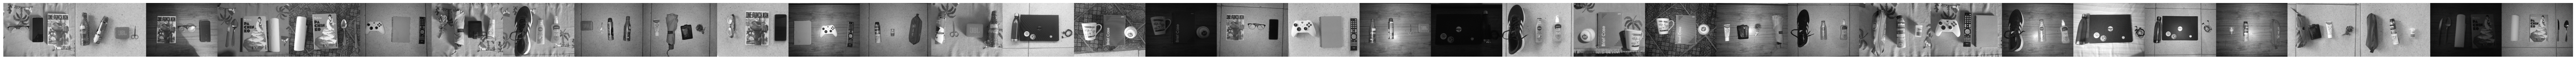

In [ ]:
images = loadImages(gray_path)
displayImages(images)

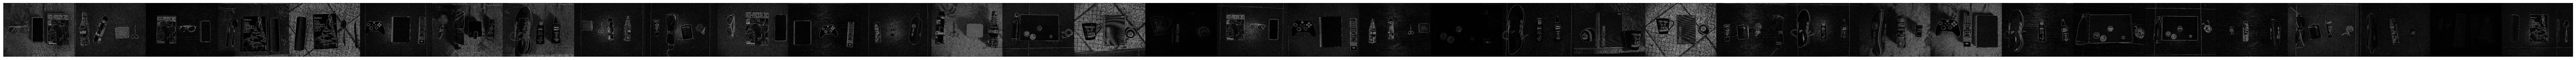

In [ ]:
laplacian_path = '/content/mac0417/EP2/augmentedDataSet/Laplacian'
images = loadImages(laplacian_path)
displayImages(images)

In [ ]:
contrast_path = '/content/mac0417/EP2/augmentedDataSet/contrastStretched'
images = loadImages(contrast_path)
displayImages(images)

In [ ]:
log_path = '/content/mac0417/EP2/augmentedDataSet/logTransformation'
images = loadImages(log_path)
displayImages(images)

In [ ]:
mean_path = '/content/mac0417/EP2/augmentedDataSet/meanFilter'
images = loadImages(mean_path)
displayImages(images)

In [ ]:
powerlaw_path = '/content/mac0417/EP2/augmentedDataSet/powerLawTransformation'
images = loadImages(powerlaw_path)
displayImages(images)